# Project 2
## Detecting Android Malware with Network Traffic

### Joseph Bajor - jbajor
### Sahil Ahuja - sahilahu

__[Link to Presentation](https://youtu.be/jG1osZ0lZcQ)__
___

### Imports and Loading Data

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Read in the data
data = pd.read_csv('Android_Malware.csv', index_col=0)

/var/folders/rl/dnlq62k50fd_dd8959xr62nh0000gn/T/ipykernel_46031/1255865005.py:2: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Android_Malware.csv', index_col=0)


## Initial EDA
### Data Integrity Inspection

In [3]:
# Check initial data output
data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,17/06/2017 01:29:11,126711,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,17/06/2017 01:30:33,48012,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,17/06/2017 01:29:45,20028018,11,8,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,17/06/2017 01:29:45,347926,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [4]:
# Print out data info to check dtypes and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355630 entries, 0 to 409
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       355629 non-null  object 
 1    Source IP                    355630 non-null  object 
 2    Source Port                  355630 non-null  int64  
 3    Destination IP               355630 non-null  object 
 4    Destination Port             355630 non-null  float64
 5    Protocol                     355630 non-null  float64
 6    Timestamp                    355630 non-null  object 
 7    Flow Duration                355630 non-null  int64  
 8    Total Fwd Packets            355630 non-null  int64  
 9    Total Backward Packets       355630 non-null  int64  
 10  Total Length of Fwd Packets   355630 non-null  float64
 11   Total Length of Bwd Packets  355630 non-null  float64
 12   Fwd Packet Length Max        355630 non-null  

<AxesSubplot: >

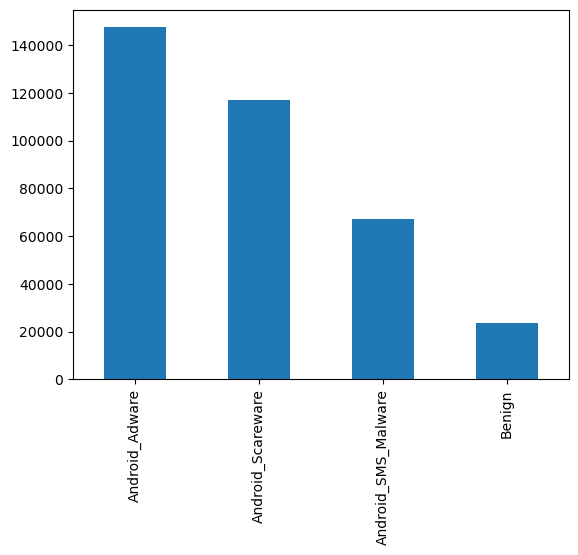

In [5]:
# Check for inbalance in the outcome label
data["Label"].value_counts().plot(kind = "bar")

We can already see that there is significant imbalance in the outcome. We will have to fix this before builduing a proper model

In [6]:
# Quantify the data imbalance
data["Label"].value_counts()

Android_Adware         147443
Android_Scareware      117082
Android_SMS_Malware     67397
Benign                  23708
Name: Label, dtype: int64

___
## Data Cleaning

### Removing Duplicates

In [7]:
# List duplicate rows
data[data.duplicated()]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
90,203.205.158.60-10.42.0.211-80-48574-6,203.205.158.60,80,10.42.0.211,48574.0,6.0,27/06/2017 02:23:49,4,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
94,10.42.0.211-111.206.25.159-33521-80-6,111.206.25.159,80,10.42.0.211,33521.0,6.0,27/06/2017 02:23:49,8,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
438,10.42.0.211-106.39.169.66-38659-443-6,10.42.0.211,38659,106.39.169.66,443.0,6.0,27/06/2017 02:29:27,5,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
475,10.42.0.211-119.146.74.34-36805-80-6,119.146.74.34,80,10.42.0.211,36805.0,6.0,27/06/2017 02:29:30,10,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
476,10.42.0.211-119.146.74.48-33523-80-6,119.146.74.48,80,10.42.0.211,33523.0,6.0,27/06/2017 02:29:30,8,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,10.42.0.211-118.178.143.65-50070-80-6,10.42.0.211,50070,118.178.143.65,80.0,6.0,30/06/2017 02:48:06,8769698,4,4,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
407,140.205.61.26-10.42.0.211-80-47648-6,10.42.0.211,47648,140.205.61.26,80.0,6.0,30/06/2017 02:48:17,892843,5,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
408,140.205.61.26-10.42.0.211-80-47648-6,10.42.0.211,47648,140.205.61.26,80.0,6.0,30/06/2017 02:48:18,109,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
409,10.42.0.211-121.41.62.82-44183-1088-6,10.42.0.211,44183,121.41.62.82,1088.0,6.0,30/06/2017 02:48:17,12192623,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware


In [8]:
# Drop duplicate rows
data = data.drop_duplicates()

### Data Sparcity checks

In [9]:
# If a column has only one unique value, it essentially does nothing from an ML standpoint and should be removed
data.columns[data.nunique()==1]

Index([' ECE Flag Count', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [10]:
# We drop the above columns from the data here
data = data.drop(columns=data.columns[data.nunique()==1])

In [11]:
# Percentage of each row that is unique
# Difficult to use this as a method of filtering based on the size of our data, as we see a lot of our categorical features have very low values
data.nunique()/len(data)*100

Flow ID              50.165133
 Source IP            0.718933
 Source Port         14.555274
 Destination IP       1.345448
 Destination Port     5.502275
                       ...    
Idle Mean            11.289458
 Idle Std             2.519384
 Idle Max            11.279820
 Idle Min            11.278402
Label                 0.001134
Length: 79, dtype: float64

We can use a variance threshold to take care of numerical features that are highly sparse. This can be visualized by plotting change in selected features vs variance threshold, as we do below

In [12]:
from sklearn.feature_selection import VarianceThreshold

data_num = data.select_dtypes(exclude='object')

x_eda = data_num.iloc[:, :-1] # Take until the last column
y_eda = data_num.iloc[:, -1] # Take the last column

transform = VarianceThreshold()

variance_thresholds = np.arange(start=0.0, stop=0.5, step=0.05)

results = []

for t in variance_thresholds:
    
    transform = VarianceThreshold(threshold=t)
    
    X_sel = transform.fit_transform(x_eda)
    print()
    rows, cols = X_sel.shape
    n_features = cols
    print('Threshold=%.2f, Features=%d' % (t, n_features))
    
    results.append(n_features)
    
d2 = pd.DataFrame({'threshold': variance_thresholds, 'n_features': results})
alt.Chart(d2).mark_line().encode(
    x='threshold',
    y='n_features')


Threshold=0.00, Features=70

Threshold=0.05, Features=68

Threshold=0.10, Features=68

Threshold=0.15, Features=67

Threshold=0.20, Features=66

Threshold=0.25, Features=64

Threshold=0.30, Features=64

Threshold=0.35, Features=64

Threshold=0.40, Features=64

Threshold=0.45, Features=64


alt.Chart(...)

Using a variance threshold to filter features does not do much to narrow things down in this case, focusing on only our numerical features. As stated above, we need to use a different approach to deal with sparse categorical features

## Non-numerical Data Analysis

Much of our data seems to be numerical, but there are a few columns that are not numerical. Additionally, just looking at a glance, there are some columns that are numerical but cannot actually be interpreted as ordinal data (Destination Port, for example). Both of these have to be dealt with in different ways.

first of all, lets look at our object columns

In [13]:
data.select_dtypes(include='object')

,Flow ID,Source IP,Destination IP,Timestamp,CWE Flag Count,Down/Up Ratio,Fwd Avg Bytes/Bulk,Label
0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,172.217.6.202,13/06/2017 11:52:39,0,1.0,0,Android_Adware
1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,172.217.6.202,13/06/2017 11:52:39,0,1.0,0,Android_Adware
2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,131.253.61.68,13/06/2017 11:52:42,0,1.0,0,Android_Adware
3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,131.253.61.68,13/06/2017 11:52:43,0,0.0,0,Android_Adware
4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,131.253.61.68,13/06/2017 11:52:42,0,0.0,0,Android_Adware
...,...,...,...,...,...,...,...,...
405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,10.42.0.211,17/06/2017 01:29:11,0,1.0,0,Benign
406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,10.42.0.1,17/06/2017 01:30:33,0,1.0,0,Benign
407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,104.192.110.245,17/06/2017 01:29:45,0,0.0,0,Benign
408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,10.42.0.1,17/06/2017 01:29:45,0,1.0,0,Benign


### Dealing with object cols that should be numerical

Here we can already see that there are a few columns that don't seem to belong here, namely `CWE Flag Count`, `Down/Up Ratio`, and `Fwd Avg Bytes/Bulk`


In [14]:
# this column seems to encode 0 in a few different ways and also has a seperate SCAREWARE label that does not make sense in this context
# We have no real way to clean this, so it should be dropped
data[' CWE Flag Count'].unique()

array([0, nan, '0', 'SCAREWARE'], dtype=object)

In [15]:
# This column seems like it should be numerically interpretable, but has a few issues with the encoding. Some intergers are strings, and there is an out of place BENIGN label again
# This can be cleaned manually
data[' Down/Up Ratio'].unique()

array([1.0, 0.0, 2.0, 3.0, 8.0, 4.0, 5.0, 9.0, 6.0, 12.0, 7.0, 10.0, 11.0,
       '1', '0', '7', '2', '3', '4', '11', '5', '12', '8', 'BENIGN', nan,
       75.0], dtype=object)

In [16]:
# cleaning Down/Up Ratio
data.loc[data[' Down/Up Ratio'] == 'BENIGN', ' Down/Up Ratio'] = pd.NA
data[' Down/Up Ratio'] = data[' Down/Up Ratio'].apply(lambda x: int(x) if not pd.isna(x) else pd.NA)
data[' Down/Up Ratio'] = data[' Down/Up Ratio'].astype('Int64')

In [17]:
# similar to CWE Flag Count, this is just varying flavors of 0/null with an out of place BENIGN lable
# will also be dropped
data['Fwd Avg Bytes/Bulk'].unique()

array([0, '0', 'BENIGN', '0.0', nan], dtype=object)

In [18]:
# drop the two unconvertable columns
data = data.drop(columns=['Fwd Avg Bytes/Bulk', ' CWE Flag Count'])

### Dealing with true object columns

Now we have to deal with our non-numerical inputs, the most important of which is likely to be the IP adress of the traffic. There are many ways we can go about converting these into numerical features, but the first we will try is simply splitting at the period and encoding each section as a different numerical column. Even these seperate components cannot be interpreted in an ordinal manner, so we will likely have to have to encode them as one-hot categorical columns to treat them properly

In [19]:
# Flow ID seems to be derivative of other columns and can be dropped as it adds no new information (just destination ip - source ip - timestamp)
data['Flow ID']

0        172.217.6.202-10.42.0.211-443-50004-6
1        172.217.6.202-10.42.0.211-443-35455-6
2        131.253.61.68-10.42.0.211-443-51775-6
3        131.253.61.68-10.42.0.211-443-51775-6
4        131.253.61.68-10.42.0.211-443-51776-6
                        ...                   
405        172.217.7.14-10.42.0.211-80-38405-6
406           10.42.0.211-10.42.0.1-7632-53-17
407    10.42.0.211-104.192.110.245-45970-443-6
408          10.42.0.211-10.42.0.1-51982-53-17
409           10.42.0.211-10.42.0.1-9320-53-17
Name: Flow ID, Length: 352745, dtype: object

In [20]:
# dropping Flow ID
data = data.drop(columns=['Flow ID'])

In [21]:
# these rows are very broken
# not only do they not have a IP that follows the format, they also have lots of nulls and it looks like the other values are nonsense
# we will drop these in a bit
data[data[' Source IP'].str.count('\.') < 3]

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2557,291380.770637023,1045267,17,1.328159e+06,442719.666667,534188.743461834,1045267,27165,1319105,146567.222222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android_Scareware
2756,0,0,0,0.000000e+00,0.000000,0,0,0,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android_SMS_Malware
2877,281,124560,17794.2857142857,2.884435e+04,65812.000000,3,0,0,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android_SMS_Malware


In [22]:
data[data[" Source IP"].str.count("\.") < 3].index


Int64Index([2557, 2756, 2877], dtype='int64')

In [23]:
# Just confirming that both features have the same problem rows
data[data[" Destination IP"].str.count("\.") < 3].index


Int64Index([2557, 2756, 2877], dtype='int64')

3 rows do not have IPs that follow the 4 section criteria, so we will need to get rid of them

In [24]:
# Remove rows that do not follow standard IP syntax
data = data.drop(labels=data[data[" Source IP"].str.count("\.") < 3].index, axis=0)


In [25]:
# Split and reassign the components of source IP to 4 new features
data[["source_ip_1", "source_ip_2", "source_ip_3", "source_ip_4"]] = data[
    " Source IP"
].str.split(".", expand=True)


In [26]:
# Do the same as above for destination IP
data[
    ["destination_ip_1", "destination_ip_2", "destination_ip_3", "destination_ip_4"]
] = data[" Destination IP"].str.split(".", expand=True)


In [27]:
# Convert datatypes to Int32
data[
    [
        "destination_ip_1",
        "destination_ip_2",
        "destination_ip_3",
        "destination_ip_4",
        "source_ip_1",
        "source_ip_2",
        "source_ip_3",
        "source_ip_4",
    ]
] = data[
    [
        "destination_ip_1",
        "destination_ip_2",
        "destination_ip_3",
        "destination_ip_4",
        "source_ip_1",
        "source_ip_2",
        "source_ip_3",
        "source_ip_4",
    ]
].astype(
    "Int32"
)

# remove original source and destination IP categories
data = data.drop(columns=[" Destination IP", " Source IP"])

### Dealing with numerical columns that should be treated as object columns (classes)

There are multiple interger/float columns that cannot really be treated as ordinal data and should not be fed into the model as an interger. Things like port number should have no mathematical impact on the outcome, as they are just numerical identifiers to call out a wide variety of different ports with no real significance to the magnitude of the number (for our purposes, at least).

Interestingly, out first pass of models did not remove this type of numerical data, and it turns out that destination port was consistently the most important feature for fit models. Why this is can be for multiple reasons, but it may be that the average of the port numbers is slightly lower/higher for positive samples than for other samples

In [28]:
# Ideally, features like port number should be encoded as categorical information, but there might be too many values to properly do that
data[' Destination Port'].value_counts()

443.0      137642
80.0       100282
53.0        66712
0.0          2152
1900.0       1756
            ...  
34636.0         1
42916.0         1
43330.0         1
34649.0         1
56948.0         1
Name:  Destination Port, Length: 19397, dtype: int64

In [29]:
# Same applies to source port, to a greater extent
data[' Source Port'].value_counts()

443      19652
80       13758
0         2152
60774     1502
43477      754
         ...  
25975        1
16798        1
10258        1
20517        1
9320         1
Name:  Source Port, Length: 51331, dtype: int64

We see that there are 19397 individual values for destination port and 51331 for source port, but the majority are explained by the top 5 or so ports

To encode this column, we can take these top 5 ports and turn them into one-hot categorical features, and then have a final feature for other. Alternativley, we can leave out the other feature, and just have features indicating whether or not the source/destination port is one of those top 5.

In [30]:
def convert_ports(df:pd.DataFrame, top_n_ports:int=5):
    """
    Helper function to convert categorial columns to dummies using only the top n values
    """
    # get the top n destination and source ports
    top_dest_ports = df[' Destination Port'].value_counts().index[:top_n_ports]
    top_src_ports = df[' Source Port'].value_counts().index[:top_n_ports]
    
    # convert destination and source port columns to arrays for easy processing
    dest_ports = df[' Destination Port'].to_numpy()
    src_ports = df[' Source Port'].to_numpy()

    # iterate through the top n ports for each feature and add a new feature for each
    port_dummies = {}
    for port in top_dest_ports:
        # create an array that is 1 for all instances where destination port == current top port, 0 otherwise
        col = np.array(dest_ports == port, dtype=int)
        port_dummies[f'destination_port_{port}'] = col

    for port in top_src_ports:
        col = np.array(src_ports == port, dtype=int)
        port_dummies[f'source_port_{port}'] = col

    # drop original port features
    df = df.drop(columns=[' Destination Port', ' Source Port']).reset_index(drop=True)

    # create new dataframe out of generated data
    port_dummies = pd.DataFrame(data=port_dummies)

    # concatenate with the input and return a new dataframe
    return pd.concat([df, port_dummies], axis=1)


data = convert_ports(data, top_n_ports=6)

There are many rows and a few columns that are considered categoricals, so we don't want to just use the percentage of unique values per column as a deciding factor. Instead, we have to take into account the percent contribution of each unique value to each column. For example, if a column has 4 unique labels but one label takes up 99.9% of the rows, it likely does not add much modeling capability.

### Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2cb0771c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cb077700>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f1bba30>],
 'medians': [<matplotlib.lines.Line2D at 0x2cb077c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cb077ee0>],
 'means': []}

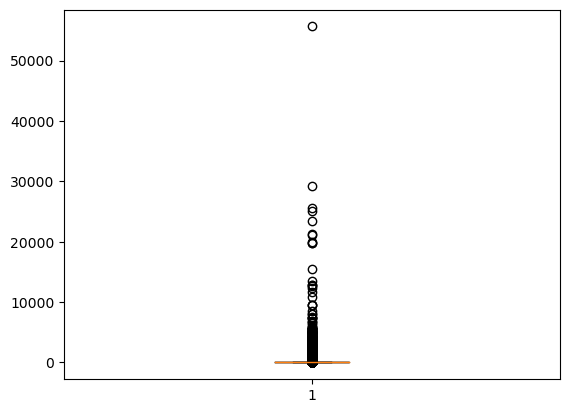

In [31]:
# visualizing box plots for known outliers
plt.boxplot(data[' Total Backward Packets'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c6686fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cb039520>,
 'boxes': [<matplotlib.lines.Line2D at 0x17fc398b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cb039a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cb039d00>],
 'means': []}

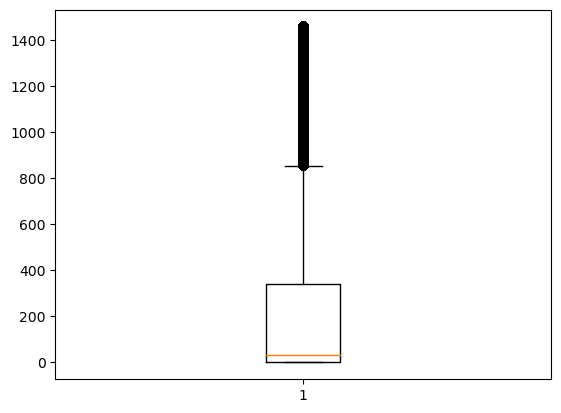

In [32]:
plt.boxplot(data[' Fwd Packet Length Max'])

In [33]:
def count_outliers(data):
    """
    Count outliers in the given dataframe
    """
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    return len(outliers)

In [34]:
# count outliers in column with known outliers
count_outliers(data[' Fwd Packet Length Max'])

27599

In [35]:
# print all counted outliers
for i in range(len(data.columns)):
    try:
        if count_outliers(data.iloc[:,i])>0:
            print(data.columns[i],":",count_outliers(data.iloc[:,i]))
    except:
        continue

 Protocol : 78242
 Flow Duration : 48201
 Total Fwd Packets : 37345
 Total Backward Packets : 40308
Total Length of Fwd Packets : 47030
 Total Length of Bwd Packets : 74677
 Fwd Packet Length Max : 27599
 Fwd Packet Length Min : 10512
 Fwd Packet Length Mean : 43507
 Fwd Packet Length Std : 41325
Bwd Packet Length Max : 69755
 Bwd Packet Length Min : 75559
 Bwd Packet Length Mean : 57762
 Bwd Packet Length Std : 70389
Flow Bytes/s : 56932
 Flow Packets/s : 62316
 Flow IAT Mean : 47596
 Flow IAT Std : 64893
 Flow IAT Max : 47032
 Flow IAT Min : 65301
Fwd IAT Total : 51998
 Fwd IAT Mean : 58966
 Fwd IAT Std : 70020
 Fwd IAT Max : 55286
 Fwd IAT Min : 76096
Bwd IAT Total : 65918
 Bwd IAT Mean : 70491
 Bwd IAT Std : 70741
 Bwd IAT Max : 64875
 Bwd IAT Min : 65251
Fwd PSH Flags : 23024
 Fwd Header Length : 49899
 Bwd Header Length : 45385
Fwd Packets/s : 62987
source_ip_1 : 36650
source_ip_2 : 36650
source_ip_3 : 33919
source_ip_4 : 31373
destination_port_53.0 : 66712
destination_port_0.0 :

In [36]:
# Checking the balance of the output variable
data['Label'].value_counts()

Android_Adware         147351
Android_Scareware      116989
Android_SMS_Malware     64492
Benign                  23708
Name: Label, dtype: int64

In [37]:
# Finding null values per column
data.isna().sum()[data.isna().sum() > 0]

 Bwd Packets/s              1
 Min Packet Length          1
 Max Packet Length          1
 Packet Length Mean         1
 Packet Length Std          1
 Packet Length Variance     1
FIN Flag Count              1
 SYN Flag Count             1
 RST Flag Count             1
 PSH Flag Count             1
 ACK Flag Count             1
 URG Flag Count             1
 Down/Up Ratio              1
 Average Packet Size        1
 Avg Fwd Segment Size       1
 Avg Bwd Segment Size       1
 Fwd Header Length.1        1
Subflow Fwd Packets         1
 Subflow Fwd Bytes          1
 Subflow Bwd Packets        1
 Subflow Bwd Bytes          1
Init_Win_bytes_forward      1
 Init_Win_bytes_backward    1
 act_data_pkt_fwd           1
 min_seg_size_forward       1
Active Mean                 1
 Active Std                 1
 Active Max                 1
 Active Min                 1
Idle Mean                   1
 Idle Std                   1
 Idle Max                   1
 Idle Min                   1
dtype: int

In [38]:
# only one na, easy to drop
data = data.dropna()

___
## Modeling

Here we will take a first pass at our model without any tuning or rebalancing

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


rfc = RandomForestClassifier(n_jobs=-1, class_weight='balanced')

data_num = data[list(data.select_dtypes(exclude=np.dtype('object')).columns) + ['Label']]

X = data_num.drop(columns='Label')
Y = data_num['Label']

x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.8, random_state=1)


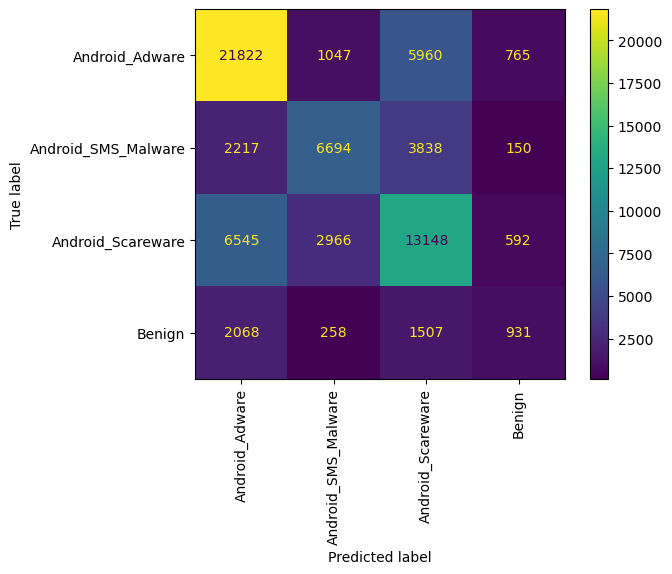

In [40]:
rfc.fit(x_train, y_train)

ConfusionMatrixDisplay.from_estimator(rfc, x_val, y_val, xticks_rotation='vertical')

plt.show()

In [41]:
y_pred = rfc.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.60
Precision: 0.60
Recall: 0.60
F1 score: 0.60
Confusion matrix:
 [[21822  1047  5960   765]
 [ 2217  6694  3838   150]
 [ 6545  2966 13148   592]
 [ 2068   258  1507   931]]


Initial results seem poor, likely due to a painfully unbalanced dataset, among other factors. Due to the volume of data availible, balancing will be a simple as downsampling the positive classes to fall in line with the benign class. In an actual model use case, a higher false positive rate will be beneficial as with most antivirus solutions.

___
## Resampling Data
Here we resample out data to balance the classes

In [42]:
from sklearn.utils import resample

In [43]:
data["Label"].unique()

array(['Android_Adware', 'Android_Scareware', 'Android_SMS_Malware',
       'Benign'], dtype=object)

In [44]:
Android_Adware = data[data["Label"] == 'Android_Adware']
Android_Scareware = data[data["Label"] == 'Android_Scareware']
Android_SMS_Malware = data[data["Label"] == 'Android_SMS_Malware']
Benign = data[data["Label"] == 'Benign']

In [45]:
print(len(Android_Adware),len(Android_Scareware) , len(Android_SMS_Malware) , len(Benign))

147351 116989 64491 23708


In [46]:
# using the sklearn resample function to resample our classes to the lowest class (Benign)
classes = [Android_Adware,Android_Scareware , Android_SMS_Malware , Benign]
downsampled_classes = []
for i in classes :
    ds = resample( i,replace=False,n_samples=len(Benign),random_state=123)
    downsampled_classes.append(ds)

In [47]:
down_sampled = pd.concat(downsampled_classes)

<AxesSubplot: >

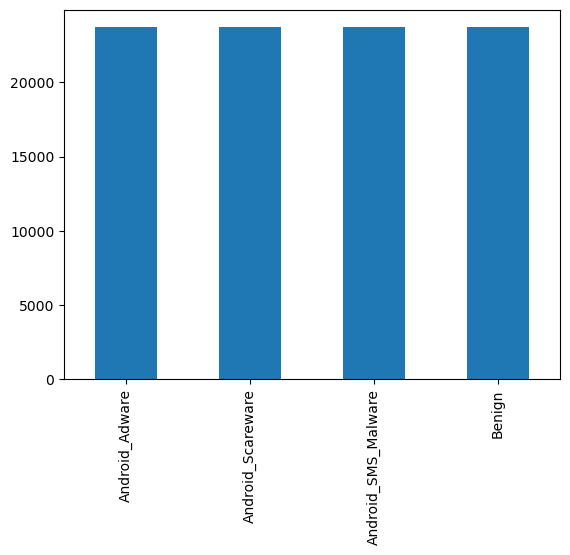

In [48]:
# Visualizing our downsampled data
down_sampled["Label"].value_counts().plot(kind='bar')

____
### Coorelation Plot

<AxesSubplot: >

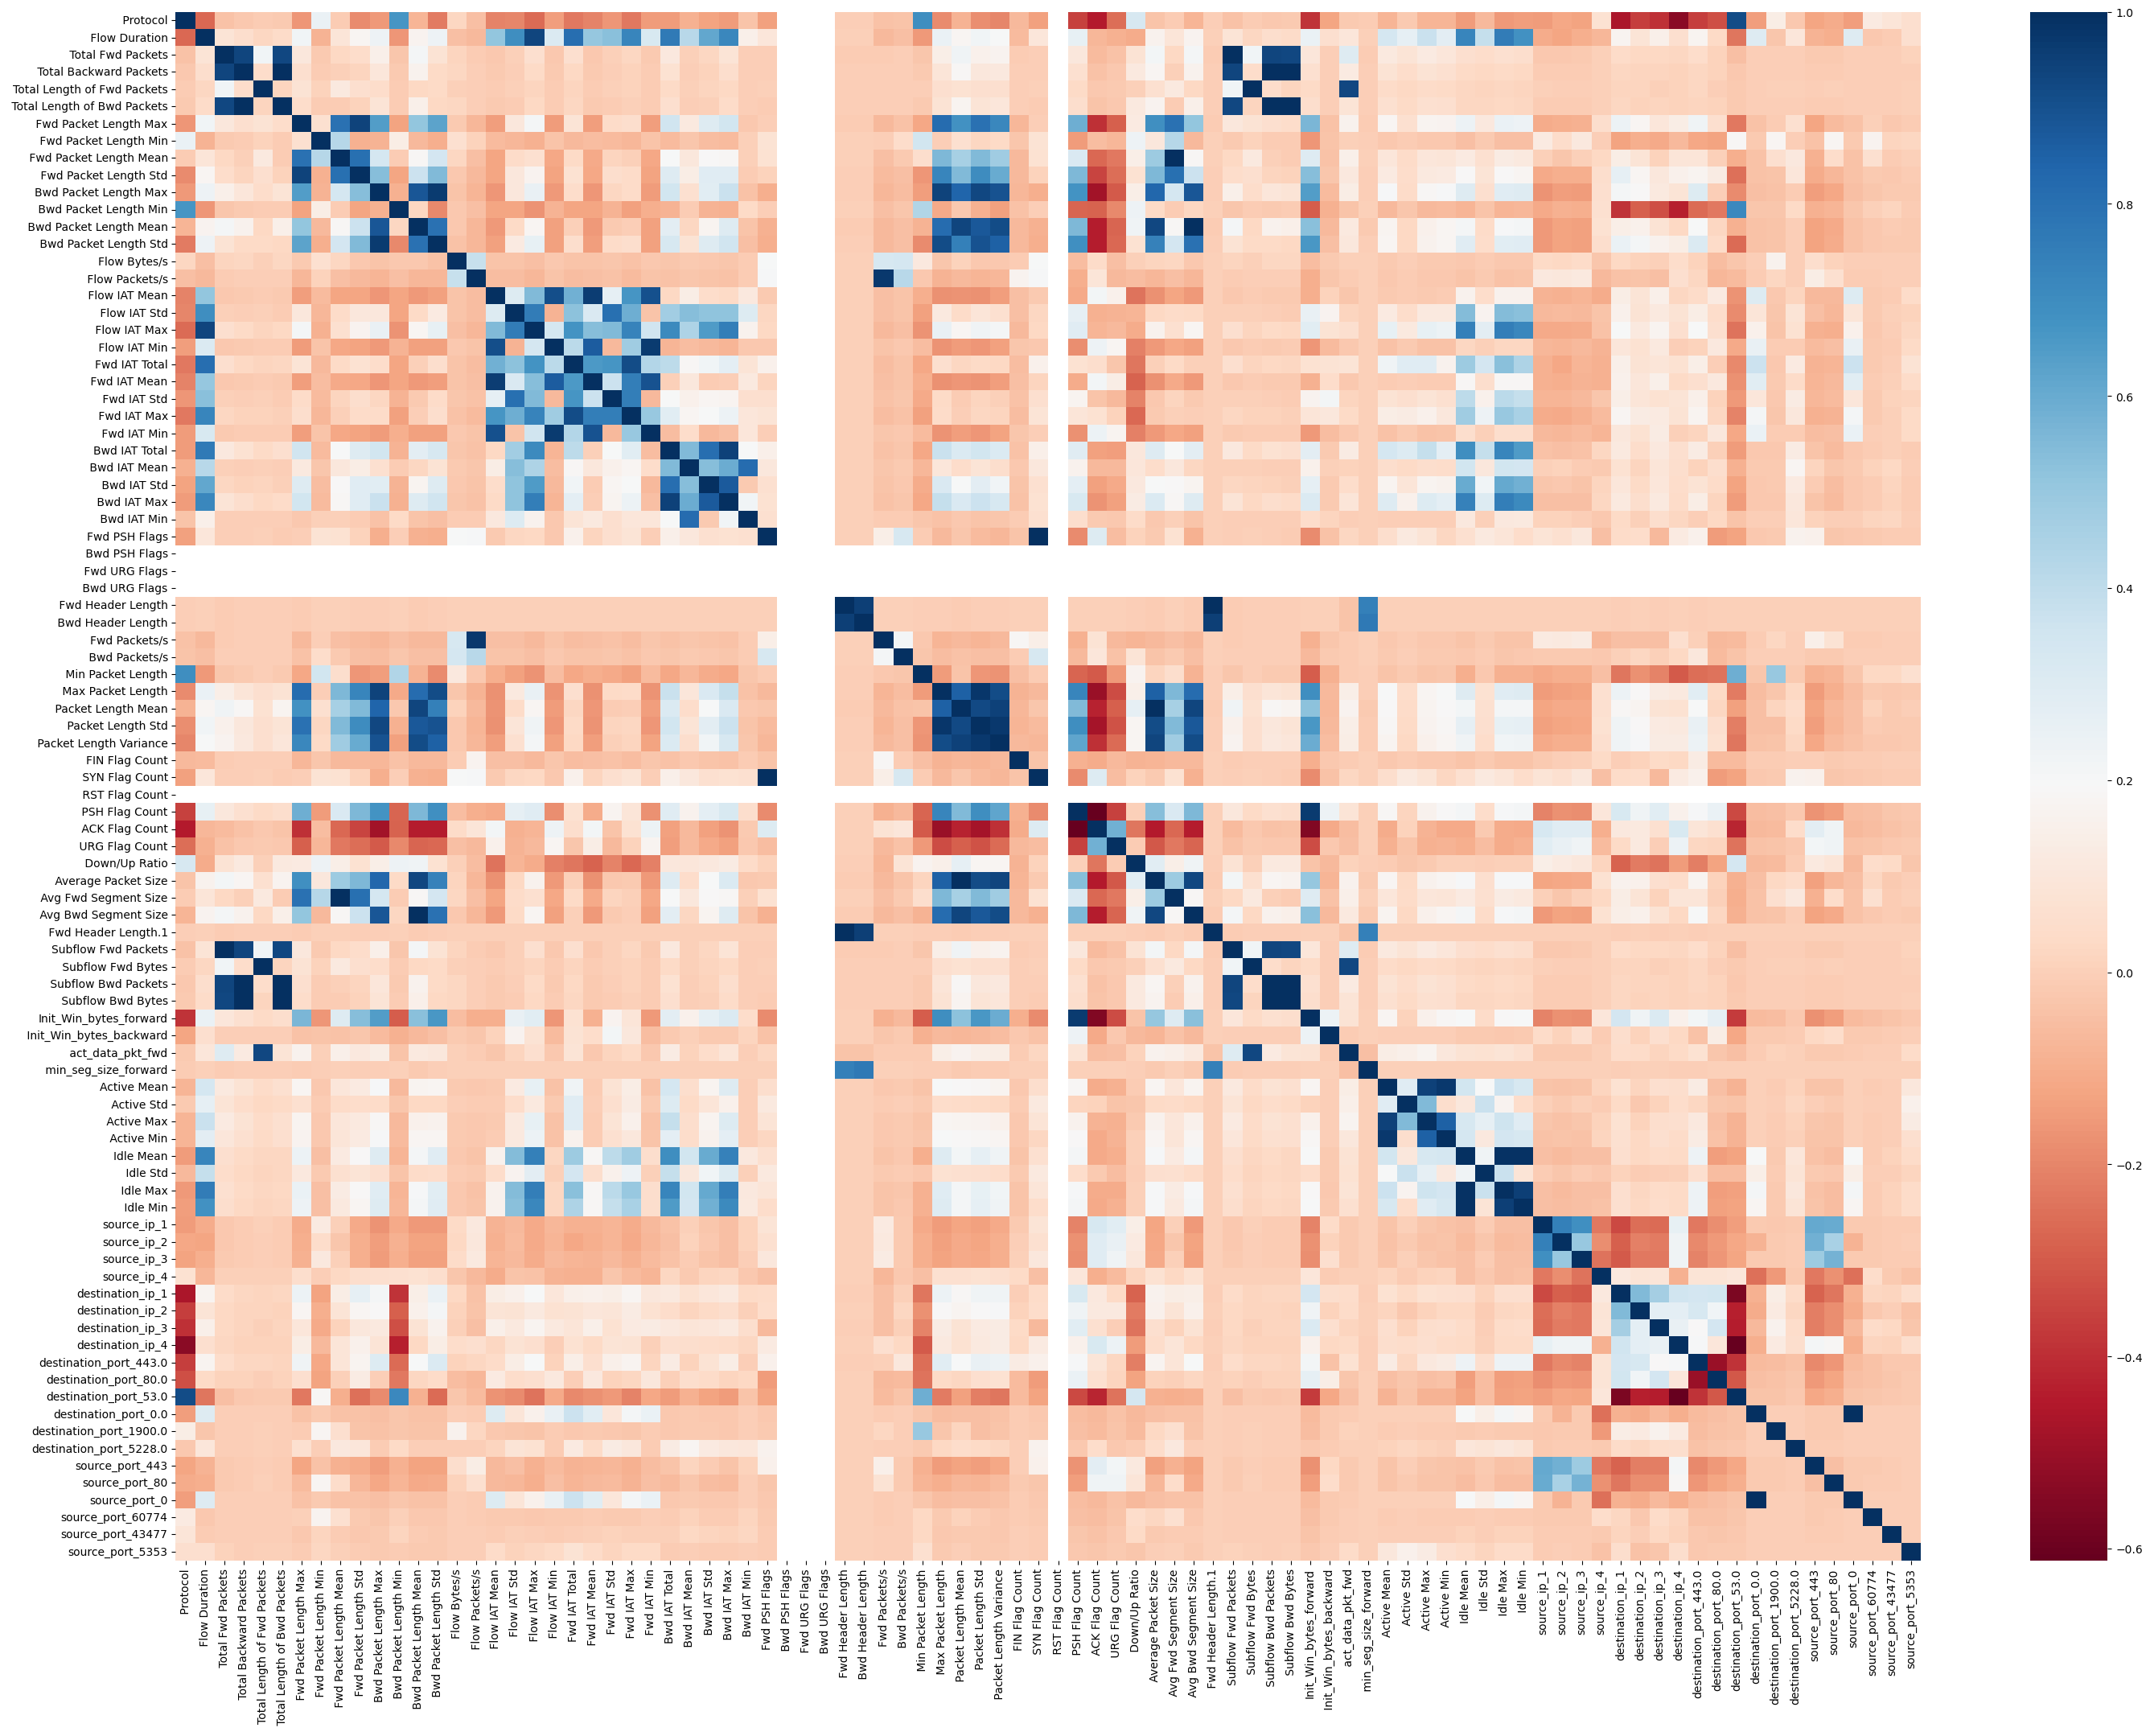

In [49]:
fig, ax = plt.subplots(figsize=(35,25))
sns.heatmap(data.select_dtypes(exclude=np.dtype("object")).corr(), cmap="RdBu", ax=ax)


### Coorelation Analysis
We can take away a few things from looking at the coorelation plot. 

First, lots of the featues dealing with aggregate statistics are rightfully coorelated.
This includes:
- mean/max/min/std packet length (both normal and fwd/bkwd)
- FWD and Flow IAT features and their aggregates

We can also see a few interesting coorelations, including some of the IP segments that we seperated the IP feature into.

We see that source IP segments 1, 2, and 3 are coorelated positivley, but they are all inversely coorelated with source IP segment 4

We also see that all of the destination IP segments are inversely coorelated with destination port 53. That is because this port always has the ip '10.42.0.1' which has bins that are all numerically lower than the average destination port
___

In [50]:
data['destination_ip_4'][data['destination_port_53.0'] == 1]

101       1
699       1
1062      1
1519      1
1520      1
         ..
352530    1
352532    1
352536    1
352538    1
352539    1
Name: destination_ip_4, Length: 66712, dtype: Int32

___
## Modeling with downsampled classes

In [51]:
data_num = down_sampled[list(down_sampled.select_dtypes(exclude=np.dtype('object')).columns) + ['Label']]

X = data_num.drop(columns='Label')
Y = data_num['Label']

x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.8, random_state=1)

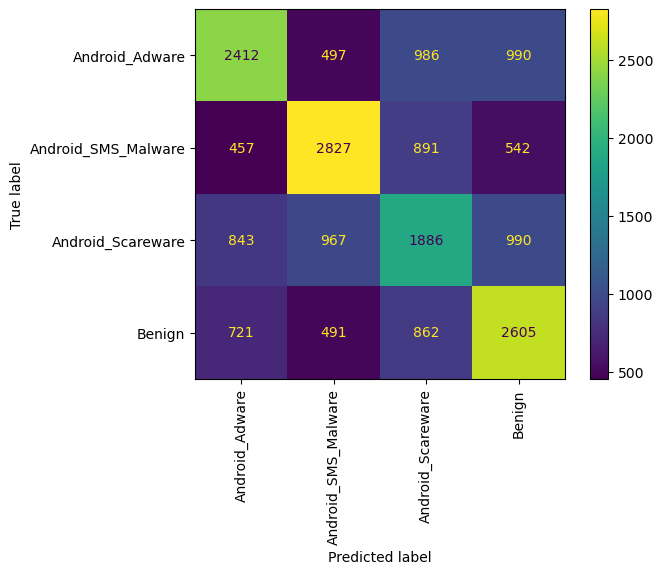

In [52]:
rfc.fit(x_train, y_train)

ConfusionMatrixDisplay.from_estimator(rfc, x_val, y_val, xticks_rotation='vertical')

plt.show()

In [53]:
y_pred = rfc.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.51
Precision: 0.51
Recall: 0.51
F1 score: 0.51
Confusion matrix:
 [[2412  497  986  990]
 [ 457 2827  891  542]
 [ 843  967 1886  990]
 [ 721  491  862 2605]]


We can see from the confusion matrix that it seems like the downsampled classes improved performance, but looking at the scoring metrics it actually looks like performance has worsened. This is likely because the model now has less data to train from, so we will need to find other ways to make up for the performance loss.
___
## Binary Classification Approach
one way we can make up for that loss is by transforming the output classes into a binary classification. Currently, we classify on 3 positive malware classes and the negative beningn class. We can combine all of these positive classes to from one uiversal malicious app class instead, which may improve out performance as the model does not have to differentiate between types of badware.

In [54]:
down_sampled["Label"] = down_sampled["Label"].apply(lambda x: 0 if x == "Benign" else 1)

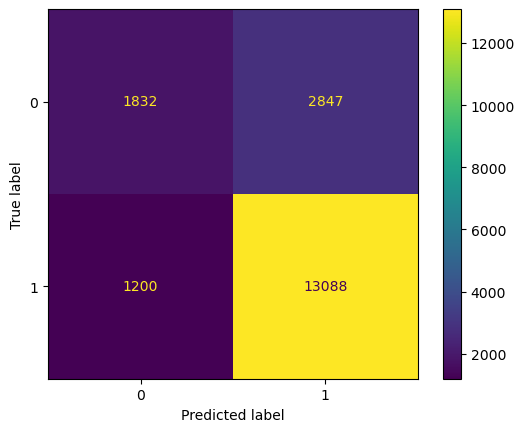

Accuracy: 0.79
Precision: 0.77
Recall: 0.79
F1 score: 0.77


In [55]:
data_num = down_sampled.select_dtypes(exclude=np.dtype('object'))


X = data_num.drop(columns='Label')
Y = data_num['Label']

x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.8, random_state=1)


rfc.fit(x_train, y_train)

ConfusionMatrixDisplay.from_estimator(rfc, x_val, y_val)

plt.show()

y_pred = rfc.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
# conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
# print("Confusion matrix:\n", conf_matrix)

In [56]:
from sklearn.metrics import roc_curve
y_prob = rfc.predict_proba(x_val)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

In [57]:
idx = np.where(thresholds == 0.5)[0][0]
fpr_at_threshold = fpr[idx]

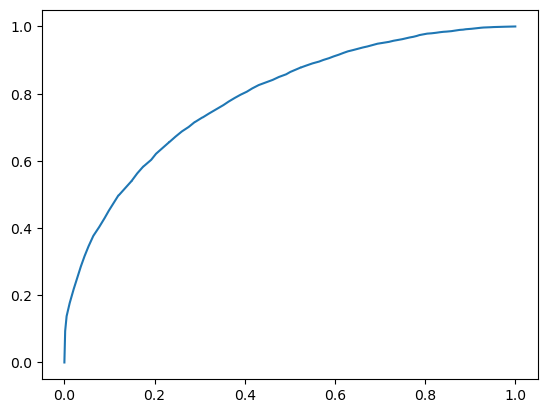

In [58]:
plt.plot(fpr,tpr)

In [59]:
mask = y_val == 0

In [60]:
y_pred = rfc.predict(x_val[mask])
accuracy = accuracy_score(y_val[mask], y_pred)

In [61]:
accuracy

0.3915366531310109

___
## Hyperparameter Tuning using GridSearchCV

Here we tun 3 different candidate models using grid search:
- Logistic Regression
- Random Forest Classifier
- Gradient Boosting Classifier

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy',verbose =2)

# Fit the GridSearchCV object to the training set
grid_search.fit(x_train, y_train)

# Evaluate the best model on the validation set
y_pred = grid_search.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
# conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
# print("Confusion matrix:\n", conf_matrix)
print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   1.6s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END .max_depth=5, min_samples_split=2, n_e

In [64]:
y_pred = grid_search.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
# conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
# print("Confusion matrix:\n", conf_matrix)
print(f"Best hyperparameters: {grid_search.best_params_}")

Accuracy: 0.74
Precision: 0.76
Recall: 0.74
F1 score: 0.75
Best hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5,verbose =2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
# conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
# print("Confusion matrix:\n", conf_matrix)
print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................................C=0.1, penalty=l1; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.1s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.1s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s


/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[CV] END ..................................C=0.1, penalty=l2; total time=   1.5s
[CV] END ..................................C=0.1, penalty=l2; total time=   1.4s
[CV] END ..................................C=0.1, penalty=l2; total time=   1.5s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   1.5s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s


/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   1.5s
[CV] END ....................................C=1, penalty=l2; total time=   1.4s
[CV] END ....................................C=1, penalty=l2; total time=   1.4s
[CV] END ....................................C=1, penalty=l2; total time=   1.4s


/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[CV] END ....................................C=1, penalty=l2; total time=   1.2s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   1.5s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s
[CV] END ..................................C=100, penalty=l1; total time=   0.0s


/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[CV] END ...................................C=10, penalty=l2; total time=   1.3s
[CV] END ...................................C=10, penalty=l2; total time=   1.2s
[CV] END ...................................C=10, penalty=l2; total time=   1.2s
[CV] END ...................................C=10, penalty=l2; total time=   1.1s
[CV] END ...................................C=10, penalty=l2; total time=   1.3s
[CV] END ..................................C=100, penalty=l2; total time=   1.2s
[CV] END ..................................C=100, penalty=l2; total time=   1.2s
[CV] END ..................................C=100, penalty=l2; total time=   1.3s
[CV] END ..................................C=100, penalty=l2; total time=   1.0s
[CV] END ..................................C=100, penalty=l2; total time=   1.1s


/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Accuracy: 0.75
Precision: 0.68
Recall: 0.75
F1 score: 0.65
Best hyperparameters: {'C': 1, 'penalty': 'l2'}


/Users/josephbajor/mambaforge/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}

# Create a GBM classifier
gbm = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='accuracy',verbose =2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
# conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
# print("Confusion matrix:\n", conf_matrix)
print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................learning_rate=0.1, max_depth=3; total time=  47.7s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=  48.0s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=  48.3s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=  48.4s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=  48.7s
[CV] END .....................learning_rate=0.1, max_depth=5; total time= 1.3min
[CV] END .....................learning_rate=0.1, max_depth=5; total time= 1.3min
[CV] END .....................learning_rate=0.1, max_depth=5; total time= 1.3min
[CV] END .....................learning_rate=0.1, max_depth=5; total time= 1.3min
[CV] END .....................learning_rate=0.1, max_depth=5; total time= 1.3min
[CV] END ....................learning_rate=0.05, max_depth=3; total time=  46.4s
[CV] END ....................learning_rate=0.05, 

In [67]:
1-sum(y_val == 0)/len(y_val)

0.7533083777086519

We can see from the above results that the Random Forest Classifier is the best performing model, so we will use that in our pipeline
___
## SkLearn Pipeline
Our pipeline makes use of the best paramaters from the RFC grid search and combines the model with a standard scaler on the input to normalize the data, since we have many features of varying magnitudes.

We use cross validation to score the model

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipe = Pipeline(steps = 
                [('scaler', StandardScaler()),
                 ('model', RandomForestClassifier(max_depth= 20, min_samples_split= 2, n_estimators =  200,random_state=42, n_jobs=-1))])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(pipe, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.779 (0.003)


In [69]:
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_val)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_val, y_pred)

print('Accuracy: %.3f' % accuracy)

Accuracy: 0.788


___
## Feature Importance

To further interpret our model, we will visualize the feature importance

In [70]:
import plotly.express as ply

In [71]:
pd.Series(data = pipe['model'].feature_importances_,index = pipe.feature_names_in_).sort_values(ascending=False)

 Flow IAT Min        0.046134
 Flow IAT Max        0.041286
 Flow IAT Mean       0.041103
source_ip_4          0.040729
destination_ip_3     0.039977
                       ...   
source_port_43477    0.000016
 Bwd URG Flags       0.000000
 Fwd URG Flags       0.000000
 Bwd PSH Flags       0.000000
 RST Flag Count      0.000000
Length: 90, dtype: float64

In [72]:
feature_indicies = pipe['model'].feature_importances_.argsort()[::-1]

In [73]:
pipe.feature_names_in_[feature_indicies]

array([' Flow IAT Min', ' Flow IAT Max', ' Flow IAT Mean', 'source_ip_4',
       'destination_ip_3', ' Flow Duration', ' Flow Packets/s',
       'destination_ip_4', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Fwd IAT Min', ' Fwd IAT Mean', ' Fwd IAT Max', 'Fwd IAT Total',
       'destination_ip_2', 'Flow Bytes/s', 'Init_Win_bytes_forward',
       'destination_ip_1', ' Flow IAT Std', ' Fwd IAT Std',
       ' Init_Win_bytes_backward', ' Bwd IAT Min', ' Packet Length Mean',
       ' Average Packet Size', ' Packet Length Std',
       ' Packet Length Variance', ' Bwd IAT Max',
       ' Fwd Packet Length Mean', 'Bwd IAT Total',
       ' Total Length of Bwd Packets', 'source_ip_3',
       ' Avg Fwd Segment Size', 'Total Length of Fwd Packets',
       ' Bwd Packet Length Mean', ' Avg Bwd Segment Size',
       ' Subflow Fwd Bytes', ' Bwd IAT Mean', ' Subflow Bwd Bytes',
       ' Fwd Packet Length Max', ' Bwd IAT Std', ' Fwd Packet Length Std',
       ' Max Packet Length', ' min_seg_size_forward

In [74]:
ply.bar(pd.Series(data = pipe['model'].feature_importances_,index = pipe.feature_names_in_).sort_values(ascending=False))

We can see that by far our most important features are related to the aggregate stats pointing to packet inter-arrival time (IAT) and packet number. All of these features are naturally coorealted, so it makes sense that they would all show up in the output.

We also see the third IP bin for destination IP show up as an important feature. This is difficult to numerically interperet but it is likely because the average value of bin 3 for destination IP for positive samples is higher than the average for negative samples, as can be seen below

In [78]:
down_sampled['destination_ip_3'][down_sampled['Label']==1].mean()

74.14159777290367

In [79]:
down_sampled['destination_ip_3'][down_sampled['Label']==0].mean()

68.47110679939262